# import neccessary libraries

In [411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
#import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
#to import random forest classifier
from sklearn.ensemble import RandomForestClassifier
import cv2 as cv

## to get key value pairs of images and corresponding labels

In [410]:
path = 'pdts/archive/Agricultural-crops'
files = os.listdir(path)
uppath =[]
for i in files:
    uppath.append(i.replace('_',' ').replace('-',' '))

labels = dict()
for j in range(len(files)):
    labels[uppath[j]] = os.listdir(path+'/'+files[j])


## to store the key value pairs in a DataFrame

In [406]:
# to save the images path in one colums and the labels in another column
data = []
for i in range(len(files)):
    for j in range(len(labels[uppath[i]])):
        data.append([path+'/'+files[i]+'/'+labels[uppath[i]][j],uppath[i]])

# to convert the list into dataframe
df = pd.DataFrame(data,columns=['image','label'])
# to read the images and convert them into array and fit it model
x = df['image']
y = df['label']
df1 = []
for i in range(len(x)):
    img = cv.imread(x[i])
    
    # to convert image to gray scale image
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img = cv.resize(img,(256,1))
    # to flatten the image
    img = img.flatten()
    img = np.ravel(img)
    # to normalize the image
    
    
        
    df1.append(img)
# for i in range(len(x)):
#     x[i]=pd.DataFrame([df1[i]])




### view the DataFrame

In [318]:
x = pd.DataFrame(df1) 


## to give the corresponding pixel names

In [322]:
# to set the columns name of the dataframe according to the image pixels
x.columns = ['pixels'+str(i) for i in range(256)]


## initiate the model

In [334]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = RandomForestClassifier(n_estimators=100)
model.fit(x,y)

RandomForestClassifier()

In [336]:
model.score(x_test,y_test)

1.0

## check the model with test data

In [337]:
model.predict(x_test)

array(['banana', 'Fox nut(Makhana)', 'Olive tree', 'Coffee plant',
       'papaya', 'cotton', 'Lemon', 'Tobacco plant', 'rice', 'maize',
       'tea', 'wheat', 'rice', 'coconut', 'almond', 'Cucumber', 'rice',
       'rice', 'maize', 'vigna radiati(Mung)', 'soyabean', 'Cherry',
       'coconut', 'clove', 'rice', 'Fox nut(Makhana)', 'Tobacco plant',
       'mustard oil', 'jowar', 'sugarcane', 'Cucumber', 'chilli', 'wheat',
       'chilli', 'almond', 'Coffee plant', 'soyabean', 'Lemon', 'Cherry',
       'Cherry', 'vigna radiati(Mung)', 'cotton', 'tomato', 'clove',
       'Fox nut(Makhana)', 'Cherry', 'maize', 'banana', 'Lemon',
       'coconut', 'clove', 'cotton', 'Pearl millet(bajra)', 'rice',
       'vigna radiati(Mung)', 'vigna radiati(Mung)', 'jute', 'clove',
       'sunflower', 'Fox nut(Makhana)', 'Lemon', 'jowar', 'cotton',
       'Tobacco plant', 'cotton', 'coconut', 'Fox nut(Makhana)',
       'Cucumber', 'soyabean', 'Pearl millet(bajra)', 'tea', 'Cherry',
       'chilli', 'rice', 

## plot a specific example

array(['papaya'], dtype=object)

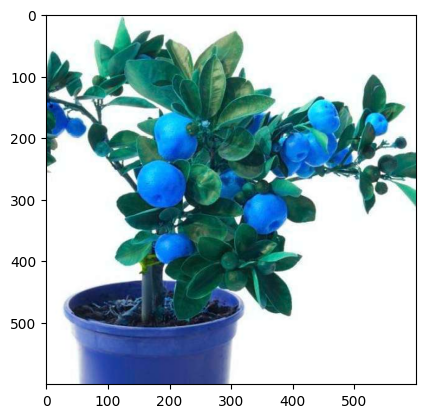

In [420]:
# to predict a specific image
img = cv.imread('orange_1.jpg')
plt.imshow(img)
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = cv.resize(img,(256,1))
img = img.flatten()
img = np.ravel(img)
img = pd.DataFrame([img])
img.columns = ['pixels'+str(i) for i in range(256)]
model.predict(img)


array(['Cherry'], dtype=object)

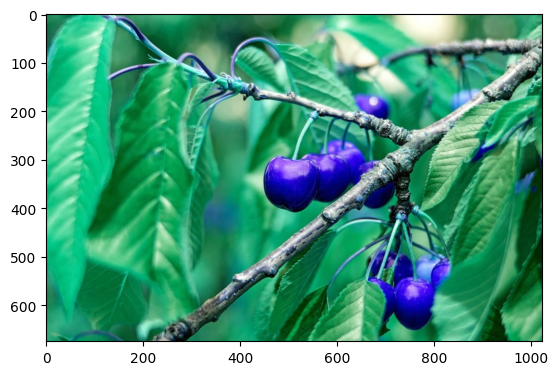

In [369]:
# to plot the image

img = cv.imread('pdts/archive/Agricultural-crops/cherry-1437707_1280-1024x675.jpg')
plt.imshow(img)
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = cv.resize(img,(256,1))
img = img.flatten()
img = np.ravel(img)
img = pd.DataFrame([img])
img.columns = ['pixels'+str(i) for i in range(256)]
model.predict(img)
